**Imports & Setup**

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_recall_fscore_support
)

from features import build_features


**Load Data & Model**

In [3]:
BASE_DIR = Path.cwd().parent
DATA_PATH = BASE_DIR / "data" / "current_catalog.csv"
MODEL_PATH = BASE_DIR / "outputs" / "collision_model.pkl"

df = pd.read_csv(DATA_PATH)
X, y = build_features(df)

model = joblib.load(MODEL_PATH)


**Predictions**

In [4]:
y_pred = model.predict(X)


**Overall Metrics**

In [5]:
accuracy = accuracy_score(y, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


Overall Accuracy: 0.9998


**Confusion Matrix (Raw + Heatmap)**

In [6]:
cm = confusion_matrix(y, y_pred)
cm


array([[11852,     1,     0],
       [    0,   550,     2],
       [    0,     0,  2093]])

**Visual Confusion Matrix**

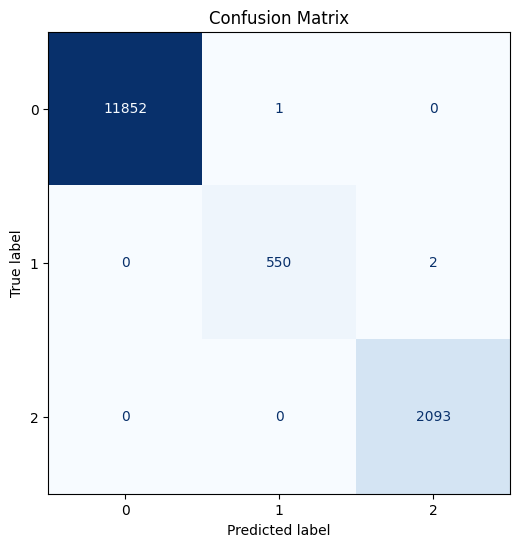

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()


**Classification Report (Precision / Recall / F1)**

In [8]:
report = classification_report(y, y_pred, digits=4)
print(report)


              precision    recall  f1-score   support

        HIGH     1.0000    0.9999    1.0000     11853
         LOW     0.9982    0.9964    0.9973       552
      MEDIUM     0.9990    1.0000    0.9995      2093

    accuracy                         0.9998     14498
   macro avg     0.9991    0.9988    0.9989     14498
weighted avg     0.9998    0.9998    0.9998     14498



**Class-wise Precision, Recall, F1 (Bar Plot)**

In [9]:
precision, recall, f1, support = precision_recall_fscore_support(y, y_pred)

classes = np.unique(y)

metrics_df = pd.DataFrame({
    "Class": classes,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Support": support
})

metrics_df


,Class,Precision,Recall,F1-Score,Support
0,HIGH,1.000000,0.999916,0.999958,11853
1,LOW,0.998185,0.996377,0.997280,552
2,MEDIUM,0.999045,1.000000,0.999522,2093
